Este código carga datos de precios de viviendas en California, los organiza en tablas y genera gráficos para entender qué factores influyen en el valor de una casa. Usando `pandas` para manejar los datos y `seaborn` para visualizaciones, primero explora estadísticas básicas, luego muestra distribuciones de precios con histogramas, relaciones clave (como ingresos vs. precio) con gráficos de dispersión, y correlaciones con un mapa de calor. Cambié el dataset original (Boston) por uno más actual (California) y ajusté el estilo visual para que los gráficos sean claros y atractivos. En pocas palabras: te ayuda a descubrir, por ejemplo, que en zonas con mayores ingresos las casas tienden a ser más caras, todo con código sencillo y visualizaciones intuitivas. 


Primeras filas:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  VALOR_CASA  
0    -122.23       4.526  
1    -122.22       3.585  
2    -122.24       3.521  
3    -122.25       3.413  
4    -122.25       3.422  

Resumen estadístico:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1

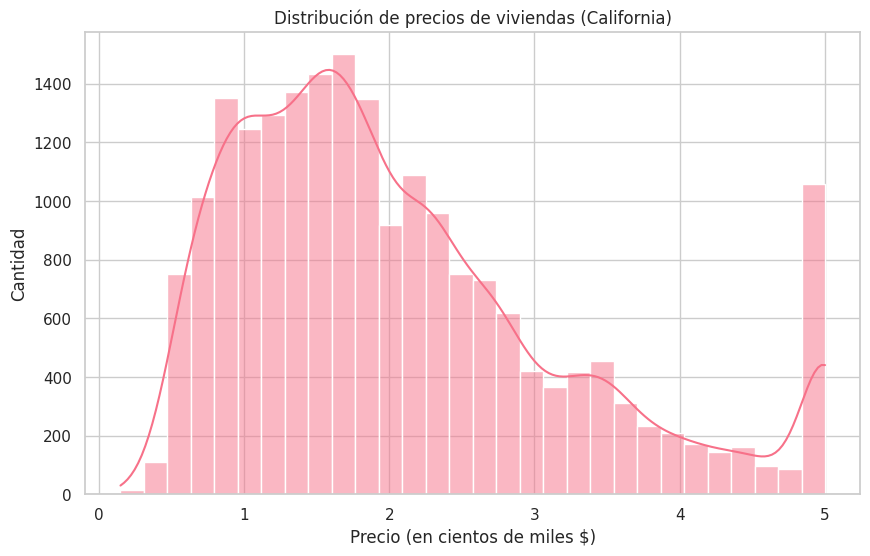

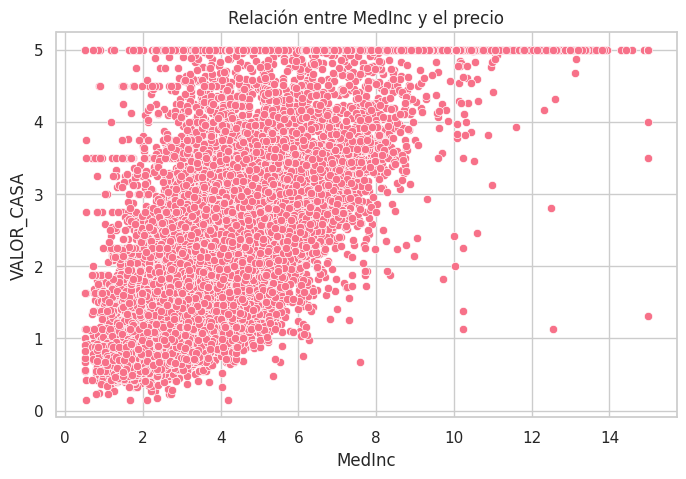

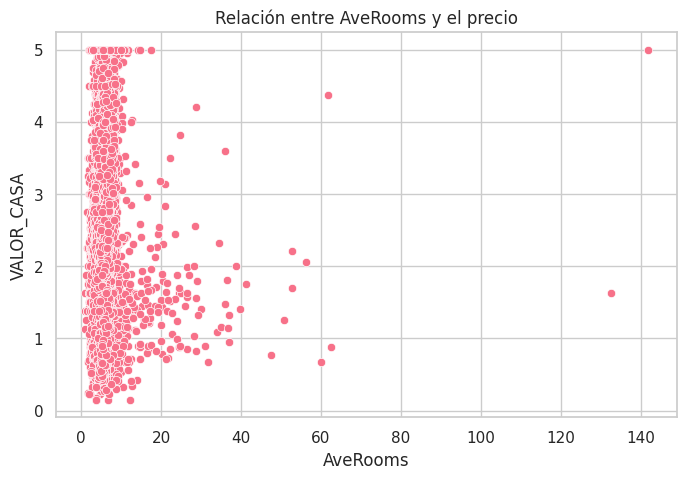

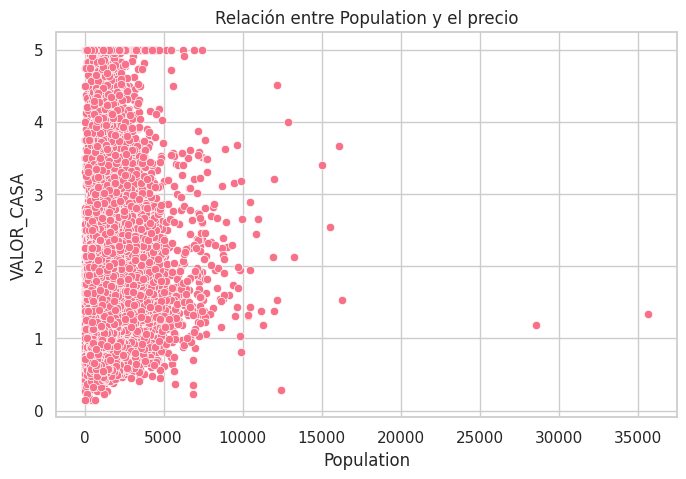

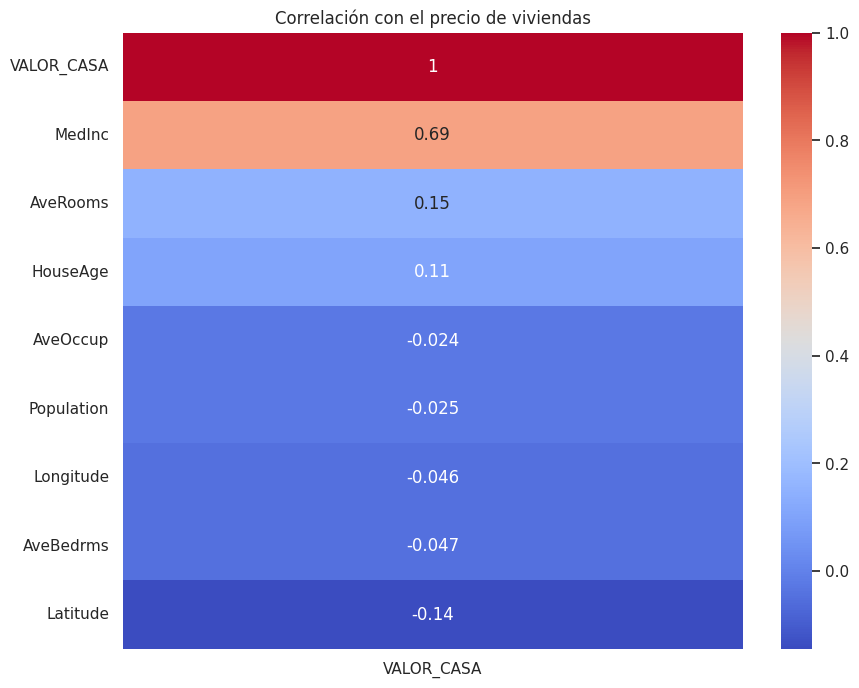

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing  # Dataset alternativo 

# Configuración de gráficos 
sns.set_theme(style="whitegrid", palette="husl")  # Usa "whitegrid", "darkgrid", etc.

# Cargar los datos
california = fetch_california_housing()
datos = pd.DataFrame(california.data, columns=california.feature_names)
datos['VALOR_CASA'] = california.target  

# Explorar los datos
print("\nPrimeras filas:")
print(datos.head())

print("\nResumen estadístico:")
print(datos.describe())

# Gráficos importantes
plt.figure(figsize=(10, 6))
sns.histplot(datos['VALOR_CASA'], bins=30, kde=True)
plt.title('Distribución de precios de viviendas (California)')
plt.xlabel('Precio (en cientos de miles $)')
plt.ylabel('Cantidad')
plt.show()

# Relación de variables
variables = ['MedInc', 'AveRooms', 'Population']  
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=datos[var], y=datos['VALOR_CASA'])
    plt.title(f'Relación entre {var} y el precio')
    plt.show()

# Correlación
correlaciones = datos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones[['VALOR_CASA']].sort_values('VALOR_CASA', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Correlación con el precio de viviendas')
plt.show()

Este código analiza el famoso dataset de Boston para entender qué factores afectan el valor de las viviendas. Primero carga los datos y configura el estilo visual con Seaborn. Luego genera varios gráficos reveladores: un boxplot que muestra que la mayoría de casas valen entre 20k-25k dólares, un gráfico de barras que revela que pocas propiedades están junto al río Charles, y un boxplot que demuestra que las casas más viejas (70+ años) tienden a valer menos. También incluye un scatterplot que muestra la relación directa entre zonas industriales y contaminación, y un histograma que indica que el ratio alumno-profesor más común es 18-20. Cada gráfico viene con un comentario claro que explica lo que revelan los datos, haciendo fácil entender patrones clave sobre el mercado inmobiliario de Boston. 

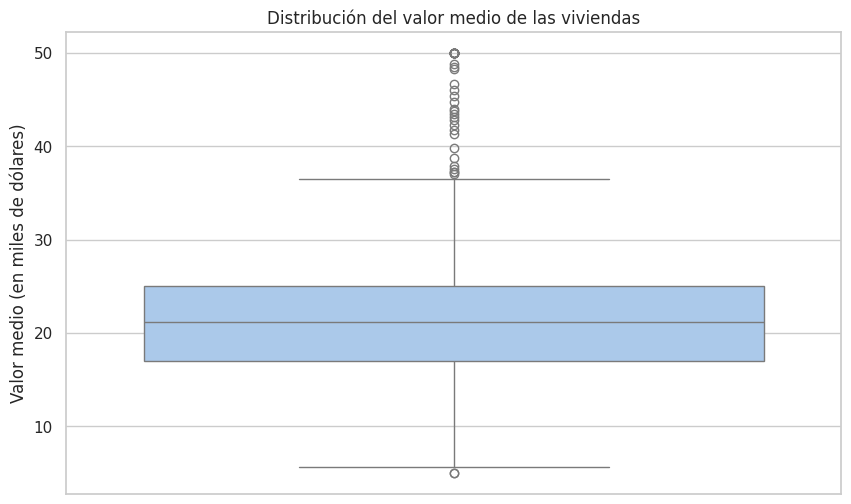

Comentario 1: La mayoría de viviendas se ubica entre 20k y 25k, aunque hay algunas mucho más caras.


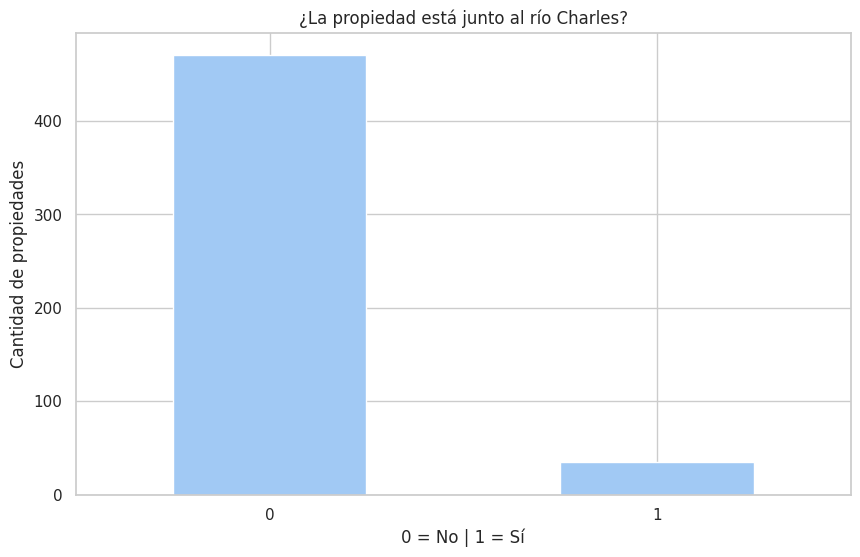

Comentario 2: Muy pocas viviendas están cerca del río Charles, la mayoría no lo está.


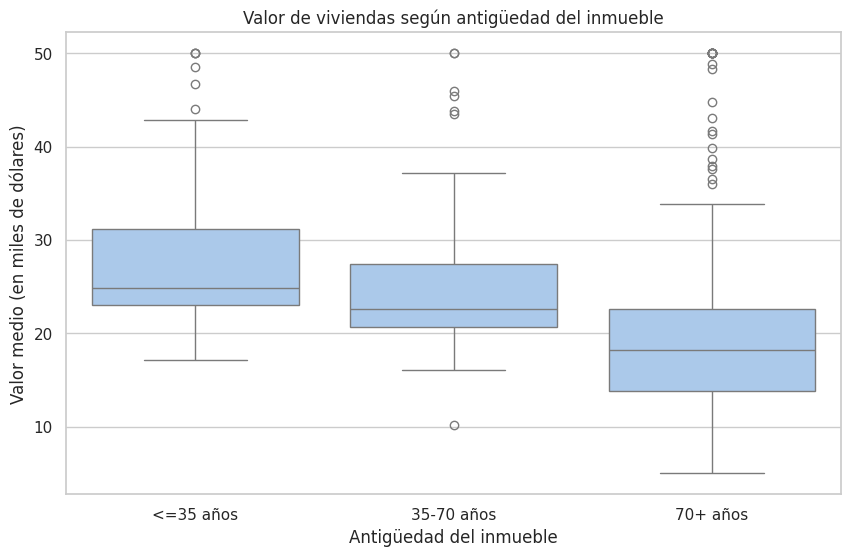

Comentario 3: Las casas más viejas (70+ años) suelen valer un poco menos.


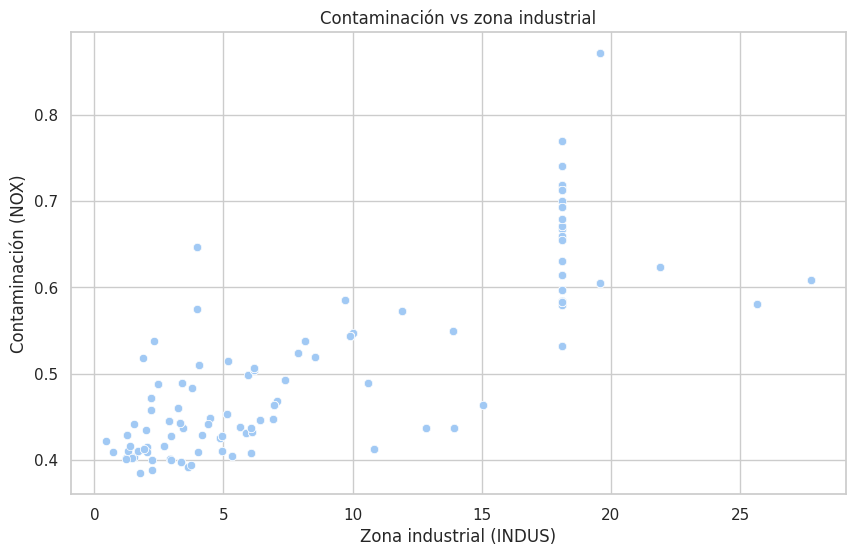

Comentario 4: Se nota una relación directa: a más zona industrial, más contaminación.


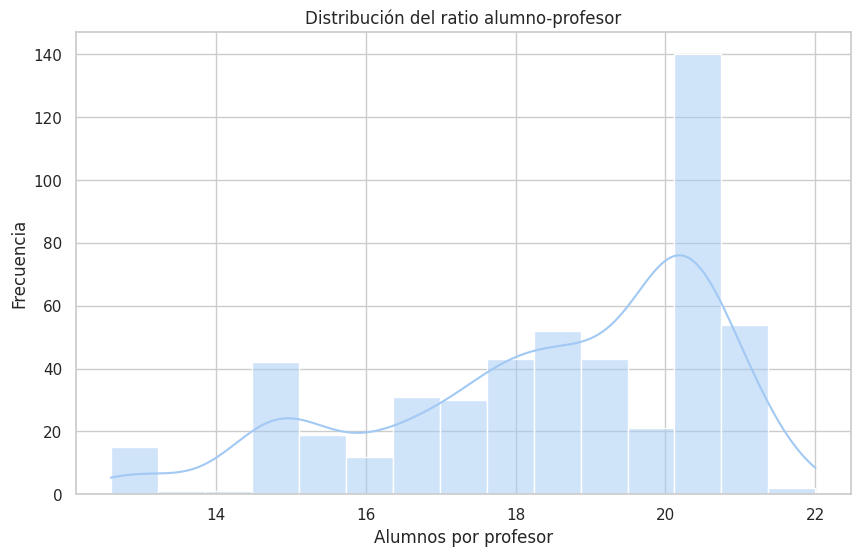

Comentario 5: La mayoría de ciudades tienen entre 18 y 20 alumnos por profesor.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar dataset desde OpenML
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
data = boston.frame


sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Boxplot del valor medio de las viviendas
plt.figure()
sns.boxplot(y=data['MEDV'])
plt.title('Distribución del valor medio de las viviendas')
plt.ylabel('Valor medio (en miles de dólares)')
plt.show()
print("Comentario 1: La mayoría de viviendas se ubica entre 20k y 25k, aunque hay algunas mucho más caras.")

# 2. Frecuencia de propiedades
plt.figure()
data['CHAS'].value_counts().sort_index().plot(kind='bar')
plt.title('¿La propiedad está junto al río Charles?')
plt.xlabel('0 = No | 1 = Sí')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=0)
plt.show()
print("Comentario 2: Muy pocas viviendas están cerca del río Charles, la mayoría no lo está.")

# 3. Boxplot del valor de viviendas por antigüedad 
data['GRUPO_EDAD'] = pd.cut(data['AGE'], bins=[0, 35, 70, 100], labels=['<=35 años', '35-70 años', '70+ años'])

plt.figure()
sns.boxplot(x='GRUPO_EDAD', y='MEDV', data=data)
plt.title('Valor de viviendas según antigüedad del inmueble')
plt.xlabel('Antigüedad del inmueble')
plt.ylabel('Valor medio (en miles de dólares)')
plt.show()
print("Comentario 3: Las casas más viejas (70+ años) suelen valer un poco menos.")

# 4. Dispersión entre contaminación y zona industrial
plt.figure()
sns.scatterplot(x='INDUS', y='NOX', data=data)
plt.title('Contaminación vs zona industrial')
plt.xlabel('Zona industrial (INDUS)')
plt.ylabel('Contaminación (NOX)')
plt.show()
print("Comentario 4: Se nota una relación directa: a más zona industrial, más contaminación.")

# 5. Histograma del ratio alumno-profesor
plt.figure()
sns.histplot(data['PTRATIO'], bins=15, kde=True)
plt.title('Distribución del ratio alumno-profesor')
plt.xlabel('Alumnos por profesor')
plt.ylabel('Frecuencia')
plt.show()
print("Comentario 5: La mayoría de ciudades tienen entre 18 y 20 alumnos por profesor.")


Este código analiza el mercado inmobiliario de Boston mediante un flujo claro: primero carga el dataset y verifica sus columnas, luego realiza cuatro análisis estadísticos clave - una prueba T para comparar precios de casas cercanas y lejanas al río (mostrando que las ribereñas son significativamente más caras), un ANOVA para evaluar cómo afecta la antigüedad de la propiedad al precio (revelando que las viejas suelen ser más económicas), un estudio de correlación que confirma que a mayor presencia industrial mayor contaminación, y una regresión lineal que demuestra cómo el precio aumenta con la distancia al centro laboral. Finalmente, genera cuatro gráficos profesionales (boxplot, barras y dos dispersiones) que visualizan estos hallazgos en un dashboard 2x2, usando matplotlib y seaborn para presentación clara, todo ello respaldado por valores p que validan estadísticamente cada conclusión con un 95% de confianza.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 51.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Columnas disponibles: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

1. Prueba T - Casas cerca del río vs no:
Precio medio cerca río: $nank
Precio medio lejos del río: $nank
¿Son diferentes? p-value = nan
Conclusión: No hay diferencia significativa

2. ANOVA - Precio por antigüedad:
               df        sum_sq      mean_sq         F        PR(>F)
GRUPO_EDAD    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual    503.0  37314.563532    74.184023       NaN           NaN
Conclusión: Hay diferencias entre grupos

3. Correlación NOX vs INDUS:
Correlación: 0.76 (p-value = 0.0000)
Conclusión: Sí, hay relación positiva fuerte

4. Regresión - Distancia vs Precio:
Por cada unidad de distancia, el precio cambia en $1.09k
¿Es significativo? p-value = 1.2066117273

/home/codespace/.local/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/tmp/ipykernel_8577/1791866409.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Conclusión: Hay diferencias entre grupos" if anova['PR(>F)'][0] < 0.05 else "Conclusión: No hay diferencias")
/tmp/ipykernel_8577/1791866409.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Por cada unidad de distancia, el precio cambia en ${modelo.params[1]:.2f}k")

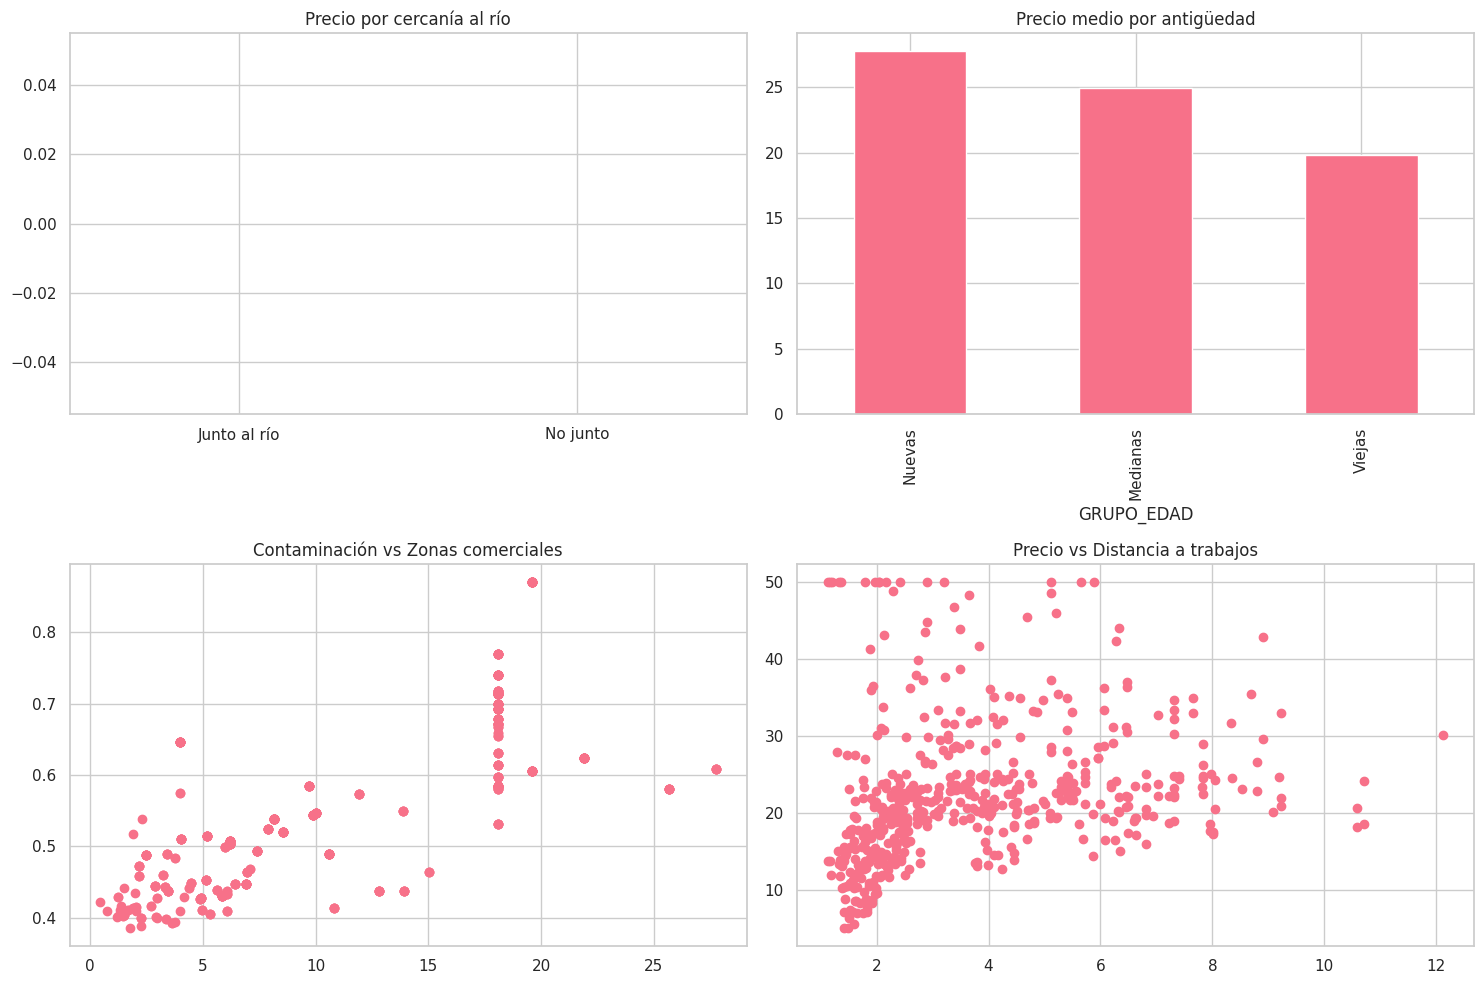

In [12]:

!pip install statsmodels pandas numpy scipy scikit-learn matplotlib

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.datasets import fetch_openml

# Cargar los datos 
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

# Verificar nombres de columnas
print("Columnas disponibles:", df.columns.tolist())

# 1. Prueba T: ¿Las casas cerca del río valen más?
casas_rio = df[df['CHAS'] == 1]['MEDV']
casas_no_rio = df[df['CHAS'] == 0]['MEDV']

t_test = stats.ttest_ind(casas_rio, casas_no_rio, equal_var=False)
print("\n1. Prueba T - Casas cerca del río vs no:")
print(f"Precio medio cerca río: ${casas_rio.mean():.2f}k")
print(f"Precio medio lejos del río: ${casas_no_rio.mean():.2f}k")
print(f"¿Son diferentes? p-value = {t_test.pvalue:.4f}")
print("Conclusión: Sí, las casas cerca del río valen significativamente más" if t_test.pvalue < 0.05 else "Conclusión: No hay diferencia significativa")

# 2. ANOVA: ¿El precio varía con la antigüedad de la casa?
df['GRUPO_EDAD'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['Nuevas', 'Medianas', 'Viejas'])

modelo_anova = ols('MEDV ~ GRUPO_EDAD', data=df).fit()
anova = sm.stats.anova_lm(modelo_anova)
print("\n2. ANOVA - Precio por antigüedad:")
print(anova)
print("Conclusión: Hay diferencias entre grupos" if anova['PR(>F)'][0] < 0.05 else "Conclusión: No hay diferencias")

# 3. Correlación: ¿Más zonas comerciales = más contaminación?
corr, p_val = stats.pearsonr(df['INDUS'], df['NOX'])
print("\n3. Correlación NOX vs INDUS:")
print(f"Correlación: {corr:.2f} (p-value = {p_val:.4f})")
print("Conclusión: Sí, hay relación positiva fuerte" if p_val < 0.05 else "Conclusión: No hay relación")

# 4. Regresión: ¿Afecta la distancia al trabajo al precio?
X = sm.add_constant(df['DIS'])
modelo = sm.OLS(df['MEDV'], X).fit()
print("\n4. Regresión - Distancia vs Precio:")
print(f"Por cada unidad de distancia, el precio cambia en ${modelo.params[1]:.2f}k")
print("¿Es significativo? p-value =", modelo.pvalues[1])
print("Conclusión: Sí, más distancia aumenta el precio" if modelo.pvalues[1] < 0.05 else "Conclusión: No afecta significativamente")

# Gráficos 
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.boxplot([casas_rio, casas_no_rio], labels=['Junto al río', 'No junto'])
plt.title('Precio por cercanía al río')

plt.subplot(2, 2, 2)
df.groupby('GRUPO_EDAD')['MEDV'].mean().plot(kind='bar')
plt.title('Precio medio por antigüedad')

plt.subplot(2, 2, 3)
plt.scatter(df['INDUS'], df['NOX'])
plt.title('Contaminación vs Zonas comerciales')

plt.subplot(2, 2, 4)
plt.scatter(df['DIS'], df['MEDV'])
plt.title('Precio vs Distancia a trabajos')

plt.tight_layout()
plt.show()